In [144]:
import numpy as np
import scipy as sp
import SolveTriangular as st
import matplotlib.pyplot as plt
import sympy as sym
from sympy import symbols, Matrix, lambdify

## Esercizio A

Data la matrice
$$
\left[
\begin{array}{cccc}
4.5 & 1 & 3 & 2\\
1 & -8 & 2 & 1\\
-1 & -2 & -3 & -1\\
2 & 6 & 0 & 1
\end{array}
\right ],
$$

calcolarne la fattorizzazione lu di Gauss  facendo uso della funzione scipy.linalg.lu  e sfruttarla per il calcolo del suo determinante e della sua inversa.

### Soluzione Teorica
#### Calcolo Determinante
> Data una matrice $A$ la fattorizziamo con: $A=LU$

- $\det(A)=\det(L)\det(U)$
    - $\det(L)=1$ e $\det(U)=\prod_{i=1}^n u_{ii}$
 
Se usiamo la scomposizione $PA=LU$
- $\det(P)=(-1)^s$, dove $s$ è numero di scambi nella matrice di permutazione.

Quindi:
$$\det(A)=(-1)^s\prod_{i=1}^n u_{ii}$$

#### Calcolo Inversa
> Basta calcolare la soluzione di $n$ sistemi lineari $Ax_i=b_i$ dove:
- $b_i$ sono i vettori colonna di una matrice identità (vettori canonici)

$$[e_1,e_2,\dots,e_n]$$

In [10]:
A=np.array([[4.5,1,3,2],[1,-8,2,1],[-1,-2,-3,-1],[2,6,0,1]])
print(A)
PT,L,U=sp.linalg.lu(A)
P=PT.T
print(P)
detA=np.linalg.det(P)*np.prod(np.diag(U))
print('Determinante Calcolato: {}, Determinante np: {}'.format(detA,np.linalg.det(A)))

[[ 4.5  1.   3.   2. ]
 [ 1.  -8.   2.   1. ]
 [-1.  -2.  -3.  -1. ]
 [ 2.   6.   0.   1. ]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Determinante Calcolato: 58.00000000000002, Determinante np: 58.000000000000036


In [21]:
n=4
I=np.eye(n)
X=np.zeros_like(A)

for i in range(n):
    #print(I[:,i])
    b=I[i]
    y,flag=st.Lsolve(L,P@b)
    x,flag=st.Usolve(U,y)
    X[:,i]=x.reshape(4,)

print('Inversa Calcolata:\n {}, \nInversa np:\n {}'.format(X,np.linalg.inv(A)))

Inversa Calcolata:
 [[ 0.5862069  -0.36206897  0.34482759 -0.46551724]
 [-0.01724138 -0.07758621 -0.06896552  0.04310345]
 [ 0.17241379 -0.22413793 -0.31034483 -0.43103448]
 [-1.06896552  1.18965517 -0.27586207  1.67241379]], 
Inversa np:
 [[ 0.5862069  -0.36206897  0.34482759 -0.46551724]
 [-0.01724138 -0.07758621 -0.06896552  0.04310345]
 [ 0.17241379 -0.22413793 -0.31034483 -0.43103448]
 [-1.06896552  1.18965517 -0.27586207  1.67241379]]


## Esercizio A1

Data La matrice 

$$
\left[
\begin{array}{cccc}
4.5 & 1 & 3 & 2\\
1 & -8 & 2 & 1\\
-1 & -2 & -3 & -1\\
2 & 6 & 0 & 1
\end{array}
\right ],
$$
dire se esiste la fattorizzaione LU senza pivotaggio a perno massimo, verificando le ipotesi del teorema di esistenza della fattorizzazione LU
### Soluzione Teorica
> Teorema di Esistenza della Fattorizzazione $A=LU$

Richiede che i minori pricnicpali escluso il determinante della matrice stessa siano $\neq 0$
$$\det(A_i) \neq 0 \qquad \text{ Con }i=1,\dots,n-1$$

In [26]:
n1=4
A1=np.array([[4.5,1,3,2],[1,-8,2,1],[-1,-2,-3,-1],[2,6,0,1]])
for i in range(1,n1):
    print(i)
    print(A1[:i,:i])
    print(np.linalg.det(A1[:i,:i]))

1
[[4.5]]
4.5
2
[[ 4.5  1. ]
 [ 1.  -8. ]]
-36.99999999999999
3
[[ 4.5  1.   3. ]
 [ 1.  -8.   2. ]
 [-1.  -2.  -3. ]]
97.0


## Esercizio A2
Data la matrice 
A=np.array([[ 21.    37.    57.5 ], [ 37.    94.    72.5 ], [ 57.5   72.5  186.25]])
dire se ammette fattorizzaione di Cholesky, verificando le ipotesi del teorema di Cholesky

### Soluzione Teorica
> La matrice deve essere simmetrica e definita positiva

In [40]:
A3=np.array([[ 21.,37.,57.5 ], [ 37.,94., 72.5 ], [ 57.5,72.5,186.25]])
print(A3)
print('Simmetrica?\n', np.all(A3==A3.T))

# Definita Positiva:
# Metodo 1 autovalori tutti positivi
autoval=np.linalg.eigvals(A3)
print('Definita Positiva?\n', np.allclose(autoval,0))

# metodo 2 
n2=3
vals=[]
for i in range(1,n2+1):
    vals.append(np.linalg.det(A3[:i,:i]))
print('Valori Positivi?\n', np.allclose(vals,0))

[[ 21.    37.    57.5 ]
 [ 37.    94.    72.5 ]
 [ 57.5   72.5  186.25]]
Simmetrica?
 True
Definita Positiva?
 False
Valori Positivi?
 False


## Esercizio B
- Implementare la function  per il calcolo del polinomio interpolatore di Lagrange

- Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,4$ sono punti equidistanti nell' intervallo [-2,2] e $y_i=f(x_i)$ dove $f(x)=5x^4+2x^2+2x-1$ 

- Visualizzare il polinomio interpolatore, i nodi dell'interpolazione

- Visualizzare l'errore assoluto tra il polinomio interpolatore e la funzione che ha generato i dati

- Commentare i risultati alla luce della teoria.


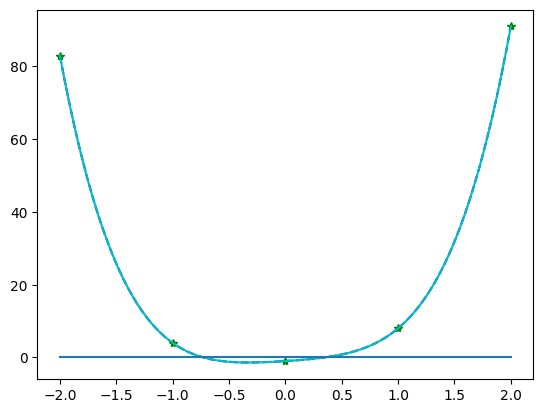

In [164]:
def plagr(nodes,j):
    n=nodes.size
    zeros=np.zeros_like(nodes)
    
    zeros=np.append(nodes[:j],nodes[j+1:]) # one-line based programming.

    num=np.poly(zeros) # Per trovare il polinomio che si annulla in tutti i valori tranne il valore j
    den=np.polyval(num,nodes[j]) # Per far sì che il polinomio trovato, dove non si annulla, valga 1

    p=num/den # Trovo il Polinomio (!! Coefficienti del Polinomio !!)
    
    return p

def InterpL(x, y, xx):
     
     n=x.size
     m=xv.size
     L=np.zeros((m,n))
     for j in range(n):
        p=plagr(x,j)
        L[:,j]=np.polyval(p,xx)
         
     return L@y # Rappresenta il Polinomio

n=4
x=np.linspace(-2,2,n+1)
f=lambda x: 5*x**4+2*x**2+2*x-1
y=f(x)
xv=np.linspace(-2,2,100)

polL=InterpL(x,y,xv)

# Perché è perfetto? Calcoliamo l'errore

E=np.abs(polL-f(xv))
plt.plot(xv,polL,'b--',x,y,'g*',xv,f(xv),'c-',xv,E)


### Spiegazione Teorica
> Teorema dell'Errore dell'interpolazione polinomiale

Sia $\overline{x}\in[a,b]$, indichiamo con:
$$E(\overline{x})=f(\overline{x})-P_{n}(\overline{x})$$
<u>Risulta che</u>
$$E(\overline{x})=f(\overline{x})-P_{n}(\overline{x})=\frac{1}{(n+1)!}\omega_{n+1}(\overline{x})f^{(n+1)}(\xi)$$
Dove $\xi \in (a,b)$ e $\omega_{n+1}(\overline{x})=\displaystyle\prod_{k=0}^{n}(\overline{x}-x_{k})$

### Risultato
Se $\overline{x}=x_{i}$, allora l'***errore è nullo***, poiché si annulla il fattore $\omega_{i+1}(\overline{x})$

*Risulta nullo* anche nel caso di dati provenienti da funzioni che hanno la **derivata** $n+1$ **nulla**.
- Polinomi di grado $n$.

## Esercizio C
Per i dati $(x_i, y_i)$ riportati nei seguenti array

x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013]) 

y = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310])

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;
- determinare l'approssimazione ai minimi quadrati espressa in termini di
basi esponenziali: $y = a + b e^{-x}+ c e^{-2x}$

Quale tra le tre approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).

### Soluzione Teorica
> Punto 3

Costruisco il sistema
$$
\begin{cases}
a+be^{ -x_{0} }+ce^{ -2x_{0} }=y_{0} \\
a+be^{ -x_{1} }+ce^{ -2x_{1} }=y_{1} \\
a+be^{ -x_{2} }+ce^{ -2x_{2} }=y_{2}\\
a+be^{ -x_{3} }+ce^{ -2x_{3} }=y_{3}
\end{cases}
$$

- Otteniamo quindi il sistema:
$$
M=\begin{bmatrix}
1 & e^{ x_{0} } & e^{ -2x_{0} } \\
1 & e^{ x_{1} } & e^{ -2x_{1} } \\
1 & e^{ x_{2} } & e^{ -2x_{2} } \\
1 & e^{ x_{3} } & e^{ -2x_{3} }
\end{bmatrix}
\begin{bmatrix}
a \\
b \\
c
\end{bmatrix}
=\begin{bmatrix}
y_{0} \\
y_{1} \\
y_{2} \\
y_{3} \\
y_{4}
\end{bmatrix}$$

#### Calcolo del Resiudo
$$\|r(\alpha)\|_2^2=\|y-B\alpha\|_2^2=\sum_{i=0}^{nNodes}(P_1(x_i)-y_i)^2$$

In [96]:
xc = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013]) 
yc = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310])

Ac1=np.vander(xc,increasing=True)[:,:2] # prendiamo le prime 2 colonne (per una retta (grado 1) necessitiamo di sistema sovradeterminato grado n+1)
Ac2=np.vander(xc,increasing=True)[:,:3]
print(Ac1)
print(np.linalg.cond(Ac1))

[[1.0000e+00 4.0000e-04]
 [1.0000e+00 2.5070e-01]
 [1.0000e+00 5.0080e-01]
 [1.0000e+00 2.0007e+00]
 [1.0000e+00 8.0013e+00]]
4.663457775986456


In [63]:
def eqnorm(A,b):
 
    G= A.T@A  
    f= A.T@b 
    
    L=sp.linalg.cholesky(G,lower=True)
    U=L.T
    # Risolvi due sistemi    
    y,f=st.Lsolve(L,f)
    if f==0:
        x,flag=st.Usolve(U,y)
        if flag!=0:
            return None
    return x

In [81]:
a1=eqnorm(Ac1,yc) # Abbiamo trovato i coefficienti del polinomio
a2=eqnorm(Ac2,yc)
xvc=np.linspace(np.min(xc),np.max(xc),100)
pol1=np.polyval(a1[::-1],xvc)
pol2=np.polyval(a2[::-1],xvc)
# più fico
#cols=['c--','g--']
#for i in range(1,3): # retta di regressione e parabola minimi quadrati
#    Acvar=np.vander(xc,increasing=True)[:,:i+1]
#    a1=eqnorm(Acvar,yc)
#    pol=np.polyval(a1[::-1],xvc)
#    plt.plot(xvc,pol,cols[i-1],)
#plt.plot(xc,yc,'ro')

0.00048483277623132274
0.0004848327762313228
0.0004848327762313227
0.00023646355940249846
1.2249733128901832e-05
Residui:
 - Retta di Regressione 0.0004848327762313227;
 - Parabola 0.00023646355940249846;
 - Termini in base esponenziale 1.2249733128901832e-05;


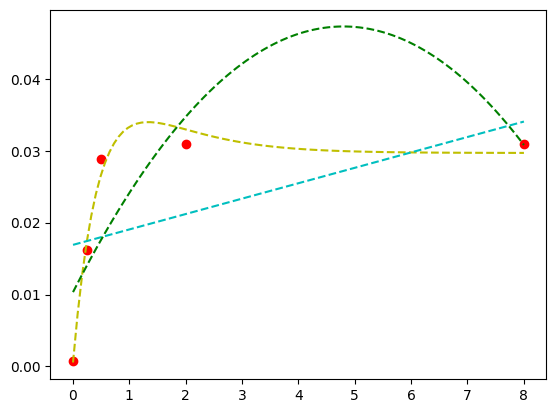

In [114]:
M=np.zeros((5,3))
M[:,0]=np.ones((5,))
M[:,1]=np.exp(-xc)
M[:,2]=np.exp(-2*xc)
# print('Matrice M\n',M)
# print('Condizionamento: ', np.linalg.cond(M))
# ben condizionata, uso eqnorm
aexp=eqnorm(M,yc)
polexp=aexp[0]+aexp[1]*np.exp(-xvc)+aexp[2]*np.exp(-2*xvc)
plt.plot(xc,yc,'ro',xvc,polexp,'y--',xvc,pol1,'c--',xvc,pol2,'g--')

print(np.sum((np.polyval(a1[::-1],xc)-yc)**2))

print(np.linalg.norm(np.polyval(a1[::-1],xc)-yc,2)**2)

print(np.linalg.norm(yc.reshape(5,1)-Ac1@a1,2)**2)

print(np.linalg.norm(yc.reshape(5,1)-Ac2@a2,2)**2)

print(np.linalg.norm(yc.reshape(5,1)-M@aexp,2)**2)


r1=np.linalg.norm(yc.reshape(5,1)-Ac1@a1,2)**2
r2=np.linalg.norm(yc.reshape(5,1)-Ac2@a2,2)**2
rexp=np.linalg.norm(yc.reshape(5,1)-M@aexp,2)**2

print('Residui:\n - Retta di Regressione {};\n - Parabola {};\n - Termini in base esponenziale {};'.format(r1,r2,rexp))
# Calcolo il residuo (scarto quadratico)

# Esercizio D

La temperatura T in prossimita' del suolo varia al variare della concentrazione k dell'acido carbonico e della latitudine L. Per k=1.5 la temperatura al suolo subisce una variazione dipendente dalla temperatura secondo la seguente tabella 

L	[-55	-45	-35	-25	-15	-5	5	15	25	35	45	55	65]

T	[3.7	3.7	3.52	3.27	3.2	3.15	3.15	3.25	3.47	3.52	3.65	3.67	3.52]

Si vuole costruire un MODELLO che descriva la legge T=T(L) anche per latitudini non misurate. 
Ad esempio si vuole valutare la variazione di temperatura a Londra ( L=51°).
mediante interpolazione con un polinomio di grado 12.
Valutare e disegnare, inoltre, il polinomio interpolatore di Lagrange in un set di 100 dati equidistanti nell’intervallo min(L), max(L).
Descrivere i risultati alla luce della teoria.

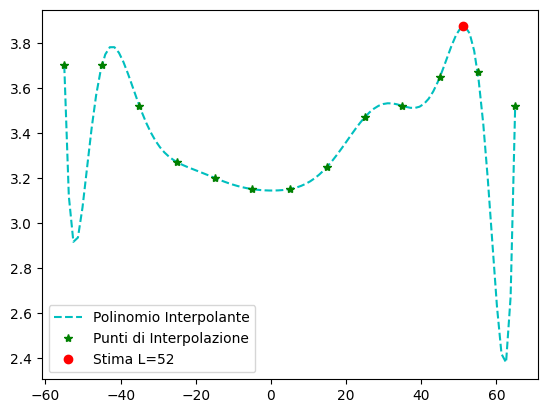

In [140]:
L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])
T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])

xv=np.linspace(np.min(L),np.max(L),100)

polD=InterpL(L,T,xv)
londra=np.array([51])

stima=InterpL(L,T,londra)

plt.plot(xv,polD,'c--',L,T,'g*',51,stima,'ro')
plt.legend(['Polinomio Interpolante','Punti di Interpolazione','Stima L=52'])
plt.show()

## Esercizio E

-  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare

Risolvere il sistema di equazioni non lineare 

$$
\left[
\begin{array}{c}
x_0^2+x_0x_1=10 \\
 x_1+3x_0x_1^2=57
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria.

- Descrivi la variante del Metodod di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili

 

**Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X_0$ nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = f1 (x1 ,x2 ) e z = f2(x1 , x 2 ) e 
definire come iterato iniziale un vettore $X_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) \]

In [153]:
def newton_raphson(initial_guess, F_numerical, J_Numerical, tolX, tolF, max_iterations):

    X= np.array(initial_guess, dtype=float)
    
    it=0
    
    erroreF=1+tolF
    erroreX=1+tolX
    
    errore=[]
    
    while erroreF>=tolF and erroreX>=tolX and it<max_iterations:
        
        jx = J_Numerical(X[0],X[1])
        
        if np.linalg.det(jx)==0:
            print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
            return None, None,None
        
        fx = F_numerical(X[0],X[1])
        fx = fx.squeeze() 
        
        s = np.linalg.solve(jx,-fx)
        
        Xnew=X+s
        
        normaXnew=np.linalg.norm(Xnew,1)
        if normaXnew !=0:
            erroreX=np.linalg.norm(s,1)/normaXnew 
        else:
            erroreX=np.linalg.norm(s,1)
        
        errore.append(erroreX)
        fxnew=F_numerical(Xnew[0],Xnew[1])
        erroreF= np.linalg.norm(fxnew.squeeze(),1)
        X=Xnew
        it=it+1
    
    return X,it,errore

def newton_raphson_sham(initial_guess, update, F_numerical, J_Numerical, tolX, tolF, max_iterations):
    
    X= np.array(initial_guess, dtype=float)
    
    it=0
    
    erroreF=1+tolF
    erroreX=1+tolX
    
    errore=[]
    
    while erroreF>=tolF and erroreX>=tolX and it<max_iterations:

        if it%update==0:
            jx = J_Numerical(X[0],X[1])
            if np.linalg.det(jx)==0:
                print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
                return None, None,None
        
        fx = F_numerical(X[0],X[1])
        fx = fx.squeeze() 
        
        s = np.linalg.solve(jx,-fx)
        
        Xnew=X+s
        
        normaXnew=np.linalg.norm(Xnew,1)
        if normaXnew !=0:
            erroreX=np.linalg.norm(s,1)/normaXnew 
        else:
            erroreX=np.linalg.norm(s,1)
        
        errore.append(erroreX)
        fxnew=F_numerical(Xnew[0],Xnew[1])
        erroreF= np.linalg.norm(fxnew.squeeze(),1)
        X=Xnew
        it=it+1
    
    
    return X,it,errore

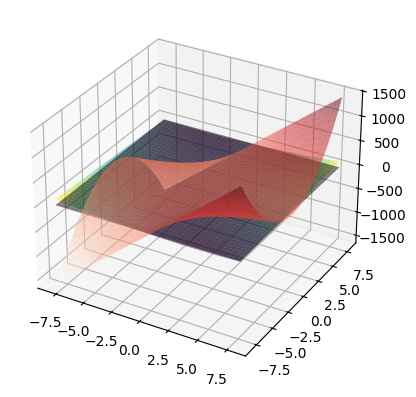

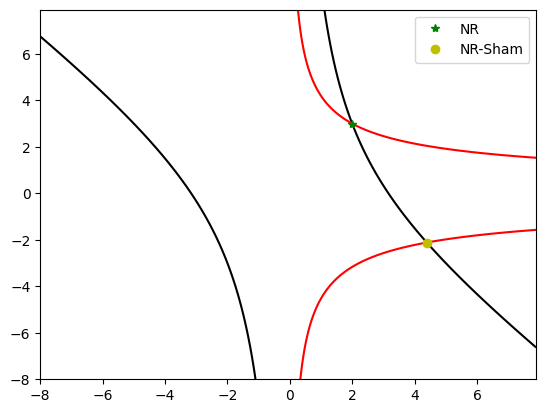

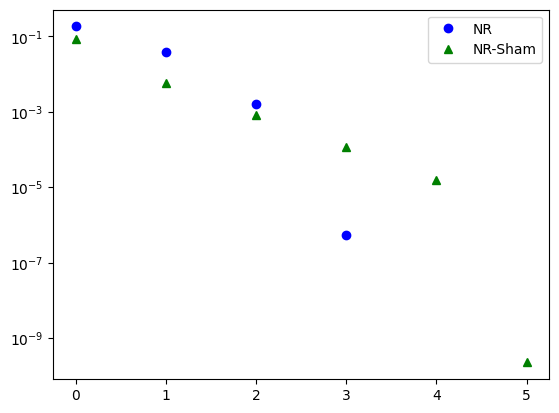

In [162]:
x_sym, y_sym = symbols('x_sym y_sym')
#Esempio di funzione non lineare simbolica
F_sym=0.5*(0.001*(x_sym-1)**2+(x_sym**2-y_sym)**2)

#Calcolo vettore gradiente
grad_f = sym.derive_by_array(F_sym, (x_sym,y_sym))

# Calcolo dell'Hessiana con sympy.hessian
H = sym.hessian(F_sym, (x_sym,y_sym))

# Conversione delle espressioni simboliche in funzioni numeriche
grad_f_func = sym.lambdify((x_sym,y_sym), grad_f, 'numpy')
H_func = sym.lambdify((x_sym,y_sym), H, 'numpy')
F_func=sym.lambdify((x_sym,y_sym), F_sym, 'numpy')



#Utili per il metodo di Newton Raphson per risolvere un sistema di equazioni non lineari

#Scrivere in froma simbolica le due equazioni del sistema, ad esempio

f1_sym = lambda x_sym,y_sym: x_sym**2+x_sym*y_sym-10   #[-1,1]
f2_sym= lambda x_sym,y_sym: y_sym+3*x_sym*y_sym**2-57  # x_1+3x_0x_1^2=57


#Definitre il vettore di Funzioni
def F_sym(f1_sym,f2_sym):
    return Matrix([[f1_sym(x_sym,y_sym)], [f2_sym(x_sym,y_sym)]])   

# Calcolo della matrice Jacobiana simbolicamente
J_sym = F_sym(f1_sym,f2_sym).jacobian(Matrix([x_sym, y_sym]))

# Converte la matrice jacobiana Simbolica in una funzione che può essere valutata numericamente mediante lambdify
J_numerical = lambdify([x_sym, y_sym], J_sym, np)

# Converte il vettore di funzioni Simbolico in una funzione che può essere valutata numericamente mediante lambdify
F_numerical = lambdify([x_sym, y_sym], F_sym(f1_sym,f2_sym), np)

#Disegnare superfici e curve di livello per determinare la stima dell'iterato iniziale
#Esempio 
x = np.arange(-8, 8, 0.1)
y = np.arange(-8, 8, 0.1)
X, Y = np.meshgrid(x, y)
Z=np.zeros_like(X)
superfici=F_numerical(X,Y).squeeze()
 
# Plotta la superficie  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plotta la superficie
ax.plot_surface(X, Y, superfici[0,:,:], cmap='viridis',alpha=0.5)
# Plotta la superficie
ax.plot_surface(X, Y, superfici[1,:,:], cmap='Reds',alpha=0.5)
ax.plot_surface(X, Y, Z, cmap='gray',alpha=0.5)
plt.show()

#Plot superifici di controllo
plt.contour(X, Y,superfici[0,:,:], levels=[0], colors='black')
plt.contour(X, Y,superfici[1,:,:], levels=[0], colors='red')

initial_guess=np.array([3,3])
initial_guesss=np.array([4,-2])
tolX=1e-10
tolF=1e-10
max_iterations=2000
update=4

X,it,errore=newton_raphson(initial_guess, F_numerical, J_numerical, tolX, tolF, max_iterations)
Xs,its,errores=newton_raphson_sham(initial_guesss, update, F_numerical, J_numerical, tolX, tolF, max_iterations)

plt.plot(X[0],X[1],'g*',Xs[0],Xs[1],'yo')
plt.legend(['NR','NR-Sham'])
plt.show()
plt.semilogy(range(len(errore)),errore,'bo',range(len(errores)),errores,'g^')
plt.legend(['NR','NR-Sham'])
plt.show()